In [25]:
#the idea is to conduct analysis on sports health data
#come up with an independent and dependent ttest to be used within a function
#independent = true and dependent = false
#compares series and labels
#outputs t-stat, p-value and hist plot with the difference between two series or labels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

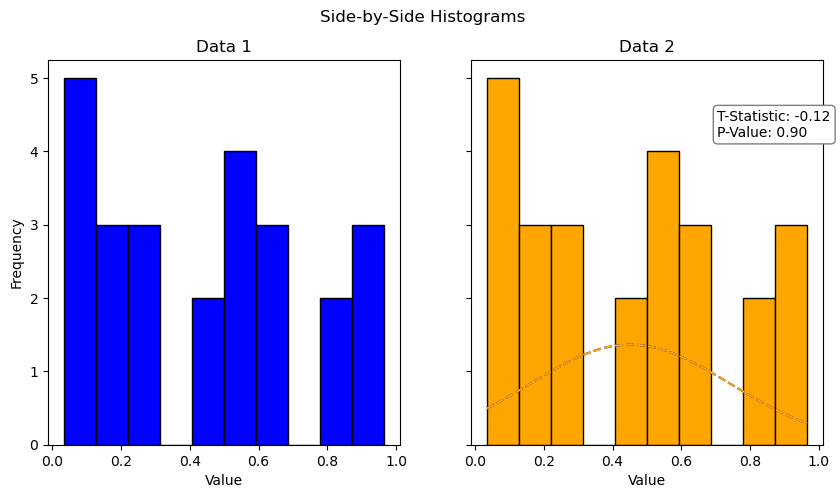

In [139]:
#creating a fuction to perform a ttest
from scipy.stats import ttest_ind, ttest_rel

#Parameters:series1 first dataset, series2 second dataset, type of t-test ("independent" or "dependent")
def perform_ttest(series1, series2 , test_type="independent"):

    # Check the type of t-test
    if test_type == "independent":
        # Perform an independent t-test
        t_stat, p_value = ttest_ind(series1, series2, equal_var=False)  # Unequal variance (Welch's t-test)
    elif test_type == "dependent":
        # Perform a paired t-test
        t_stat, p_value = ttest_rel(data, data1)
    else:
        raise ValueError("Invalid test_type. Use 'independent' or 'dependent'.")
    
    # Return the tstat and p-value
    return {"t_statistic": t_stat, "p_value": p_value}


#a function for ploting histogram for the datasets
def plot_histograms(series1, series2, bins=10, overlay=True):
    
    if overlay:
        # Plot overlayed histograms
        plt.hist(series1, bins=bins, density=True, alpha=0.7, color='blue', label='Data 1')
        plt.hist(series2, bins=bins, density=True, alpha=0.7, color='orange', label='Data 2')

        plt.title('Overlayed Histograms')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
    else:
        # Plot side-by-side histograms
        fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
        
        # First histogram
        axs[0].hist(data1, bins=bins, color='blue', edgecolor='black')
        axs[0].set_title('Data 1')
        
        # Second histogram
        axs[1].hist(data2, bins=bins, color='orange', edgecolor='black')
        axs[1].set_title('Data 2')
        
        # Add common labels
        fig.suptitle('Side-by-Side Histograms')
        axs[0].set_xlabel('Value')
        axs[0].set_ylabel('Frequency')
        axs[1].set_xlabel('Value')

         # Add density lines for distribution
        x1 = np.linspace(min(series1), max(series1), 100)
        x2 = np.linspace(min(series2), max(series2), 100)
        plt.plot(x1, norm.pdf(x1, np.mean(series1), np.std(series1)), color='blue', linestyle='--', label='Data 1 Distribution')
        plt.plot(x2, norm.pdf(x2, np.mean(series2), np.std(series2)), color='orange', linestyle='--', label='Data 2 Distribution')
         
        # Calculate t-test
        ttest_result = perform_ttest(data, data1, test_type="independent")
        t_stat = ttest_result["t_statistic"]
        p_value = ttest_result["p_value"]
    
        # Add annotations for t-statistic and p-value
        plt.text(0.7, 0.8, f"T-Statistic: {t_stat:.2f}\nP-Value: {p_value:.2f}", transform=plt.gca().transAxes,
             fontsize=10, bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))
           
    plt.show()

#performing the ttest on random data
np.random.seed(42)
data = np.random.rand(25)
data1 =np.random.rand(25)

#print(f"The t-statistic and p-value are : {perform_ttest(data, data1, test_type = "independent")}")

# Call the function to plot
plot_histograms(data1, data2, bins=10, overlay=False)



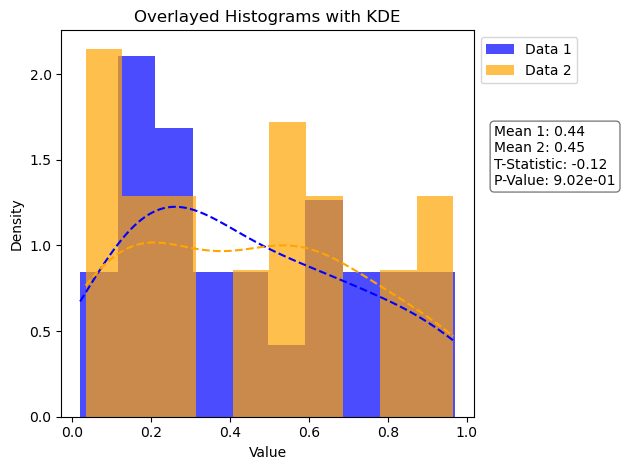

In [223]:
#creating a fuction to perform a ttest
from scipy.stats import gaussian_kde, ttest_ind, ttest_rel

#Parameters:series1 first dataset, series2 second dataset, type of t-test ("independent" or "dependent")
def perform_ttest(series1, series2, test_type="independent"):
   
    # Check the type of t-test
    if test_type == "independent":
        # Perform an independent t-test
        t_stat, p_value = ttest_ind(series1, series2, equal_var=False)  #  Unequal variance (Welch's t-test)
    elif test_type == "dependent":
         # Perform a paired t-test
        t_stat, p_value = ttest_rel(series1, series2) 
    else:
        raise ValueError("Invalid test_type. Use 'independent' or 'dependent'.")
    # Return the tstat and p-value
    return {"t_statistic": t_stat, "p_value": p_value}


# Function for plotting histograms with KDE and annotations
def plot_histograms(series1, series2, bins=10, overlay=True):
    # Perform t-test
    ttest_result = perform_ttest(series1, series2, test_type="independent")
    t_stat = ttest_result["t_statistic"]
    p_value = ttest_result["p_value"]
    mean1 = np.mean(series1)
    mean2 = np.mean(series2)

    if overlay:
        # Plot overlayed histograms
        plt.hist(series1, bins=bins, density=True, alpha=0.7, color='blue', label='Data 1')
        plt.hist(series2, bins=bins, density=True, alpha=0.7, color='orange', label='Data 2')

        # Add KDE (Kernel Density Estimation) for actual distribution
        kde1 = gaussian_kde(series1)
        kde2 = gaussian_kde(series2)
        x1 = np.linspace(min(series1), max(series1), 100)
        x2 = np.linspace(min(series2), max(series2), 100)
        plt.plot(x1, kde1(x1), color='blue', linestyle='--') #label='Data 1 Distribution')
        plt.plot(x2, kde2(x2), color='orange', linestyle='--') #label='Data 2 Distribution')

        # Add t-statistic and p-value annotation
        plt.text(1.05, 0.6, f"Mean 1: {mean1:.2f}\nMean 2: {mean2:.2f}\n"
                            f"T-Statistic: {t_stat:.2f}\nP-Value: {p_value:.2e}",
                 transform=plt.gca().transAxes, fontsize=10,
                 bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

        # Move legend outside the plot
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.title('Overlayed Histograms with KDE')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.tight_layout()  # Adjust layout to accommodate legend
        plt.show()
    else:
        # Plot side-by-side histograms
        fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

        # First histogram and KDE
        axs[0].hist(series1, bins=bins, density=True, color='blue', alpha=0.7, edgecolor='black')
        kde1 = gaussian_kde(series1)
        x1 = np.linspace(min(series1), max(series1), 100)
        axs[0].plot(x1, kde1(x1), color='blue', linestyle='--', label='Data 1 Distribution')
        axs[0].set_title('Data 1')
        axs[0].set_xlabel('Value')
        axs[0].set_ylabel('Density')

        # Second histogram and KDE
        axs[1].hist(series2, bins=bins, density=True, color='orange', alpha=0.7, edgecolor='black')
        kde2 = gaussian_kde(series2)
        x2 = np.linspace(min(series2), max(series2), 100)
        axs[1].plot(x2, kde2(x2), color='orange', linestyle='--', label='Data 2 Distribution')
        axs[1].set_title('Data 2')
        axs[1].set_xlabel('Value')

        # Add t-statistic and p-value annotation to the middle of the figure
        fig.text(1.1, 0.6, f"Mean 1: {mean1:.2f}\n Mean 2: {mean2:.2f} \n"
                            f"T-Statistic: {t_stat:.2f}\nP-Value: {p_value:.2e}",
                 ha='center', fontsize=10, bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

        # Move legends outside the plots
        #axs[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
        #axs[1].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

        # Add common title and adjust layout
        fig.suptitle('Side-by-Side Histograms with KDE')
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for annotations
        plt.show()

# Perform the t-test on random data
np.random.seed(42)
data1 = np.random.rand(25)
data2 = np.random.rand(25)

# Call the function to plot
plot_histograms(data1, data2, bins=10, overlay=False)